In [27]:
import numpy as np, pandas as pd, keras, cv2, os, random
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

In [28]:
df = pd.read_csv("train (35 MB).csv")
base_path = "images/"

In [29]:
df

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7
...,...,...
1580465,72c3b1c367e3d559,203092
1580466,7a6a2d9ea92684a6,203092
1580467,9401fad4c497e1f9,203092
1580468,aacc960c9a228b5f,203092


In [30]:
df = df.loc[df["id"].str.startswith(("00","7d","bb"),na=False ),:]
num_classes = len(df["landmark_id"].unique())
num_data = len(df)

In [31]:
num_classes

13532

In [32]:
num_data

18330

In [33]:
data = pd.DataFrame(df["landmark_id"].value_counts())
data

,count
landmark_id,
138982,80
126637,33
83144,26
194914,17
20409,16
...,...
76590,1
76645,1
76647,1


In [34]:
data.reset_index(inplace=True)
data.columns=["landmark_id","count"]
data

,landmark_id,count
0,138982,80
1,126637,33
2,83144,26
3,194914,17
4,20409,16
...,...,...
13527,76590,1
13528,76645,1
13529,76647,1
13530,76654,1


(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0604e+04, 0.0000e+00,
        0.0000e+00, 1.9980e+03, 0.0000e+00, 0.0000e+00, 5.4600e+02,
        0.0000e+00, 0.0000e+00, 2.1300e+02, 0.0000e+00, 0.0000e+00,
        7.2000e+01, 0.0000e+00, 0.0000e+00, 3.8000e+01, 0.0000e+00,
        0.0000e+00, 1.8000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.5000e+01, 0.0000e+00, 0.0000e+00, 1.0000e+01, 0.0000e+00,
        0.0000e+00, 7.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

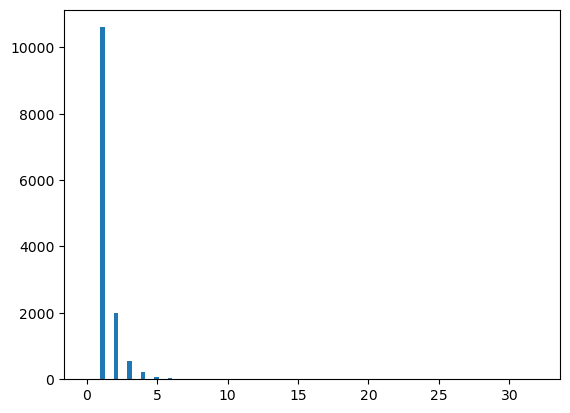

In [35]:
plt.hist(data["count"],100, range = (0,32), label="test")

In [36]:
data["count"].between(0,5).sum()

13433

In [37]:
data["count"].between(5,10).sum()

160

(array([1., 1., 5., ..., 1., 1., 3.]),
 array([1.20000e+01, 2.20000e+01, 2.70000e+01, ..., 2.03071e+05,
        2.03073e+05, 2.03080e+05]),
 <BarContainer object of 13531 artists>)

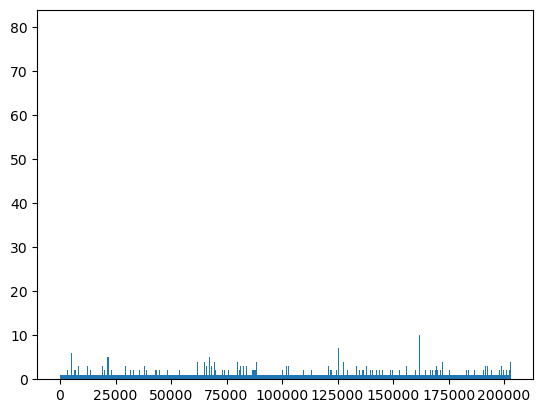

In [38]:
plt.hist(df['landmark_id'], bins = df['landmark_id'].unique())

In [39]:
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
lencoder.fit(df["landmark_id"])

LabelEncoder()

In [40]:
def encode_label(label):
    return lencoder.transform(label)

In [41]:
def decode_label(label):
    return lencoder.inverse_transform(label)

In [42]:
def get_image_from_numbers(num,df):
    fname, label = df.iloc[num, :]
    fname = fname + '.jpg'
    f1 = fname[0]
    f2 = fname[1]
    f3 = fname[2]
    full_path = os.path.join(base_path,f1,f2,f3,fname)
    im = cv2.imread(full_path)
    return im, label

4 samples


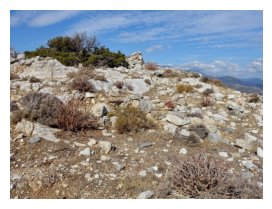

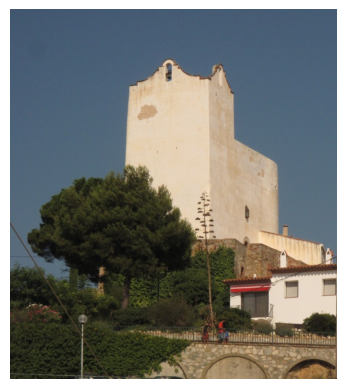

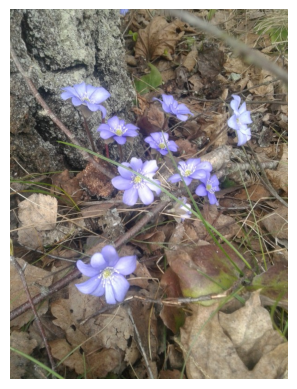

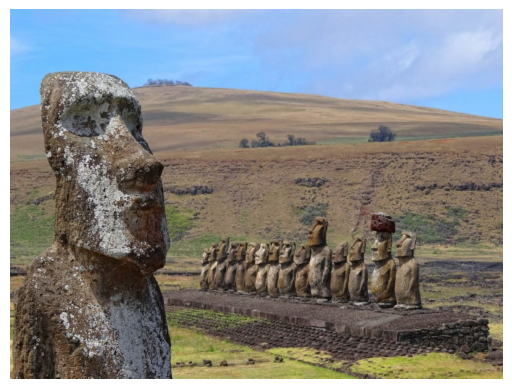

In [43]:
print("4 samples")
fig = plt.figure(figsize=(15,15))
for i in range(1,5):
    ri = random.choices(os.listdir(base_path), k=3)
    folder = base_path + random.choice(["0/0/","b/b/","7/d/"]) + ri[2]
    random_img = random.choice(os.listdir(folder))
    img = np.array(Image.open(folder + "/" + random_img))
    fig.add_subplot(1,4,1)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# model building

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.layers import *
from keras import Sequential
#tf.compat.v1.disable_eager_execution()


In [45]:
learning_rate = 0.0001
decay_speed = 1e-6
momentum = 0.9
loss_function = 'sparse_categorical_crossentropy'
source_model = VGG19(weights=None)
drop_layer = Dropout(0.5)

In [46]:
model = Sequential()
for layer in source_model.layers[:-1]:
    if layer == source_model.layers[-25]:
        model.add(BatchNormalization())
    model.add(layer)
model.add(Dense(num_classes, activation="softmax"))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 224, 224, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 195,010,856 (743.91 MB)

 Trainable params: 195,010,850 (743.91 MB)

 Non-trainable params: 6 (24.00 B)

In [47]:
optim1 = keras.optimizers.RMSprop(learning_rate)
model.compile(optimizer=optim1, loss=loss_function, metrics=["accuracy"])

In [48]:
def image_reshape(im, target_size):
    return cv2.resize(im, target_size)

In [49]:
def get_batch(dataframe, start, batch_size):
    image_array = []
    label_array = []

    end_img = start + batch_size
    if end_img > len(dataframe):
        end_img = len(dataframe)

    for idx in range(start, end_img):
        n = idx
        im, label = get_image_from_numbers(n, dataframe)
        im = image_reshape(im, (224, 224)) / 255.0
        image_array.append(im)
        label_array.append(label)
        
    label_array = encode_label(label_array)

    return np.array(image_array), np.array(label_array)


In [50]:
train, val = np.split(df.sample(frac=1),[int(0.8*len(df))])
print(len(train))
print(len(val))

14664
3666


c:\Anaconda\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [51]:
batch_size = 16
epoch_shuffle = True
weight_classes = True
epochs = 1

In [56]:
for e in range(epochs): 
    print("Epoch :" + str(e+1) + " of " + str(epochs)) 
    if epoch_shuffle: 
        train = train.sample(frac=1) 

for it in range(int(np.ceil(len(train) / batch_size))): 
    X_train, y_train = get_batch(train, it * batch_size, batch_size) 
    model.train_on_batch(X_train, y_train) 
    
model.save("Model")

Epoch :1 of 1


NotImplementedError: Cannot convert a symbolic tf.Tensor (StatefulPartitionedCall_3:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported.

In [ ]:
batch_size = 16
errors = 0 
good_preds = []
bad_preds = []

for it in range(int(np.ceil(len(val)/batch_size))):
    X_val, y_val = get_batch(val, it*batch_size, batch_size)
    
    result = model.predict(X_val)
    cla = np.argmax(result, axis = 1)
    for idx, res in enumerate(result):
        if cla[idx] != y_val[idx]:
            errors = errors+1
            bad_preds.append([batch_size*it + idx, cla[idx], res[cla[idx]]])
        else:
            good_preds.append([batch_size*it + idx, cla[idx], res[cla[idx]]])

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
good_preds = np.array(good_preds)
good_preds - np.array(sorted(good_preds, key = lambda x: x[2], reverse=True))

array([], dtype=float64)

In [ ]:
len(good_preds)

0

In [ ]:
fig = plt.figure(figsize = (16,16))
for i in range(7,12):
    n = int(good_preds[i,0])
    img, lb1 = get_image_from_numbers(n,val)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(1,5,i-6)
    plt.imshow(img)
    lbl2  = np.array(int(good_preds[i,1])).reshape(1,1)
    sample_cnt = list(df.landmark_id).count(lb1)
    plt.title("Label: " + str(lb1) + "\nClassified as: " + str(decode_label(lbl2)) + "\nSamples in class " + str(lb1) + ":")
    plt.axis("off")
    plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 1600x1600 with 0 Axes>